In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist

df = pd.read_csv('all-experiments.csv', index_col=0)
df['Wall clock'] = df['Wall clock'].apply(lambda x: float('nan') if x == '0' else float(x[:-1]))
# True if x % 2 == 0 else False
df = df.rename(columns={
    'Batch size': 'Batch_size',
    'Memory per executor': 'Memory_per_executor',
    'Cores per executor': 'Cores_per_executor',
    'Total executor cores': 'Total_executor_cores',
    'Wall clock': 'Wall_clock'
})
df_lenet = df[df['Model'] == 'lenet5']
df_birnn= df[df['Model'] == 'bi-rnn']

331.8771470055779
819.6167581477868


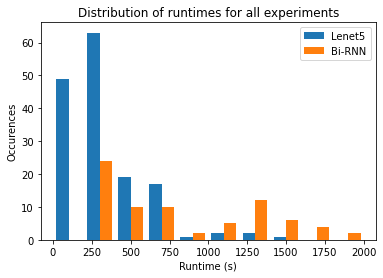

In [59]:
runtimes_birnn = df_birnn.loc[df_birnn['Wall_clock'] < 2000]['Wall_clock']
runtimes_lenet5 = df_lenet['Wall_clock']
hist([runtimes_lenet5, runtimes_birnn], range=(0, 2000), label=['Lenet5', 'Bi-RNN'])
plt.xlabel('Runtime (s)')
plt.ylabel('Occurences')
plt.title('Distribution of runtimes for all experiments')
plt.legend()
print(np.mean(runtimes_lenet5))
print(np.mean(runtimes_birnn))

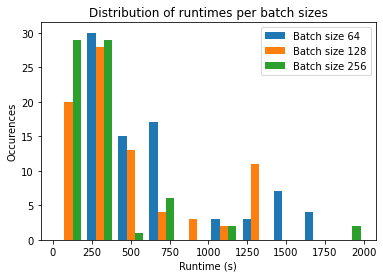

In [55]:
runtimes_64 = df.loc[df['Batch_size'] == 64]['Wall_clock']
runtimes_128 = df.loc[df['Batch_size'] == 128]['Wall_clock']
runtimes_256 = df.loc[df['Batch_size'] == 256]['Wall_clock']

hist([runtimes_64, runtimes_128, runtimes_256], range=(0, 2000), label=['Batch size 64', 'Batch size 128', 'Batch size 256'])
plt.xlabel('Runtime (s)')
plt.ylabel('Occurences')
plt.title('Distribution of runtimes per batch sizes')
plt.legend()